## Visualizing Data with Pandas and MatPlotLib


### As a Data Analyst, I want to set up the proper imports so I have access to the Pandas and MatPlotLib libraries

In [347]:
import pandas as pd
import matplotlib.pyplot as plt


### As a Data Analyst, I want to import and store the `ufo_sightings.csv` file in a variable

In [348]:
df = pd.read_csv('ufo_sightings.csv', index_col='#')
df

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Described_Duration,Description,Date_Documented,Latitude,Longitude
#,,,,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111
1,10/10/1949 21:00,Lackland Afb,TX,NaN,light,7200.0,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082
2,10/10/1955 17:00,Chester (Uk/England),NaN,GB,circle,20.0,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.418056,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
65531,8/12/2011 23:15,Yonkers,NY,US,light,3600.0,1 hour,Blinking lights in the sky not moving then dis...,8/21/2011,40.931111,-73.899167
65532,8/12/2011 23:27,Mandeville,LA,US,sphere,60.0,1 minute,Silent orange/red illuminated jagged spherical...,8/21/2011,30.358056,-90.065556
65533,8/12/2012 00:00,Davis,CA,US,unknown,900.0,15 mins,Multi colored lights seen heading northeast ov...,8/19/2012,38.545000,-121.739444


### As a Data Analyst, I want to ensure my DataFrame is cleaned by removing any **null** values

In [349]:
nonnull_df = df.dropna()
nonnull_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            53562 non-null  object 
 1   City                 53562 non-null  object 
 2   State/Province       53562 non-null  object 
 3   Country              53562 non-null  object 
 4   UFO_Shape            53562 non-null  object 
 5   Length_of_Encounter  53562 non-null  float64
 6   Described_Duration   53562 non-null  object 
 7   Description          53562 non-null  object 
 8   Date_Documented      53562 non-null  object 
 9   Latitude             53562 non-null  float64
 10  Longitude            53562 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.9+ MB


### As a Data Analyst, I want to filter my DataFrame to remove any information that is not related to my analysis
* This will include **dropping** the **Described_Duration, Description, and Date_Documented** columns

In [350]:
filtered_df = nonnull_df.drop(columns=['Described_Duration','Description','Date_Documented'])
filtered_df

,Date_Time,City,State/Province,Country,UFO_Shape,Length_of_Encounter,Latitude,Longitude
#,,,,,,,,
0,10/10/1949 20:30,San Marcos,TX,US,cylinder,2700.0,29.883056,-97.941111
3,10/10/1956 21:00,Edna,TX,US,circle,20.0,28.978333,-96.645833
4,10/10/1960 20:00,Kaneohe,HI,US,light,900.0,21.418056,-157.803611
5,10/10/1961 19:00,Bristol,TN,US,sphere,300.0,36.595000,-82.188889
7,10/10/1965 23:45,Norwalk,CT,US,disk,1200.0,41.117500,-73.408333
...,...,...,...,...,...,...,...,...
65531,8/12/2011 23:15,Yonkers,NY,US,light,3600.0,40.931111,-73.899167
65532,8/12/2011 23:27,Mandeville,LA,US,sphere,60.0,30.358056,-90.065556
65533,8/12/2012 00:00,Davis,CA,US,unknown,900.0,38.545000,-121.739444


### As a Data Analyst, I want to convert the `Date_Time` column to utilize Pandas' DateTime data type

In [351]:
filtered_df['Date_Time'] = pd.to_datetime(df['Date_Time'])
filtered_df
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53562 entries, 0 to 65535
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date_Time            53562 non-null  datetime64[ns]
 1   City                 53562 non-null  object        
 2   State/Province       53562 non-null  object        
 3   Country              53562 non-null  object        
 4   UFO_Shape            53562 non-null  object        
 5   Length_of_Encounter  53562 non-null  float64       
 6   Latitude             53562 non-null  float64       
 7   Longitude            53562 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 3.7+ MB


## Data Visualization with Matplotlib

### As a Data Analyst, I want to visualize the **frequency of different UFO shapes**, to determine which UFO shapes are most commonly encountered
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

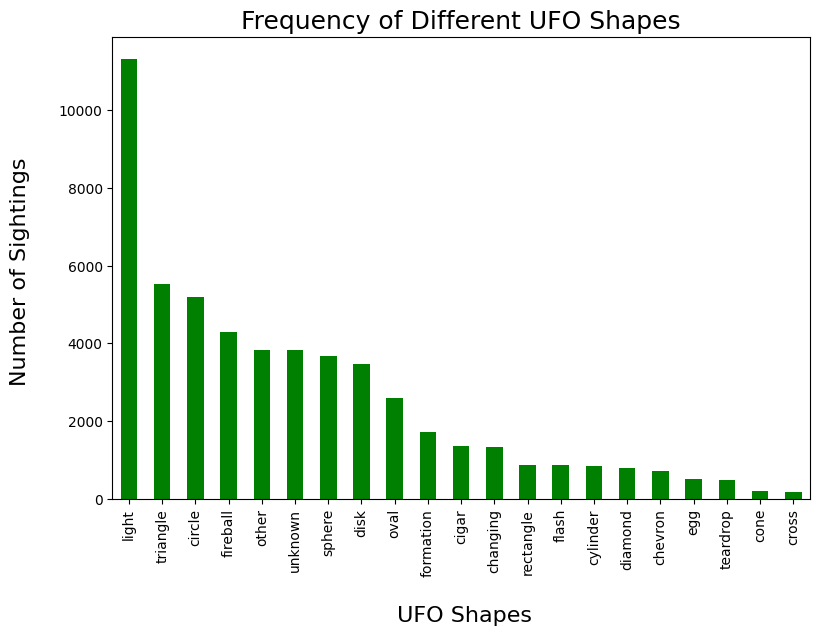

In [352]:
frequency_of_ufo_shapes = filtered_df['UFO_Shape'].value_counts();
bar_graph=frequency_of_ufo_shapes.plot.bar(figsize=(9,6),color='green');
plt.xlabel('\n UFO Shapes',fontsize=16)
plt.ylabel('Number of Sightings \n',fontsize=16)
plt.title('Frequency of Different UFO Shapes',fontsize=18)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);

#for item in bar_graph:
 #   bar_graph.bar_label(item)



### As a Data Analyst, I want to visualize the **number of UFO encounters**, grouped by each decade, to see if there is a correlation between number of sightings and decade
* I will use a **Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

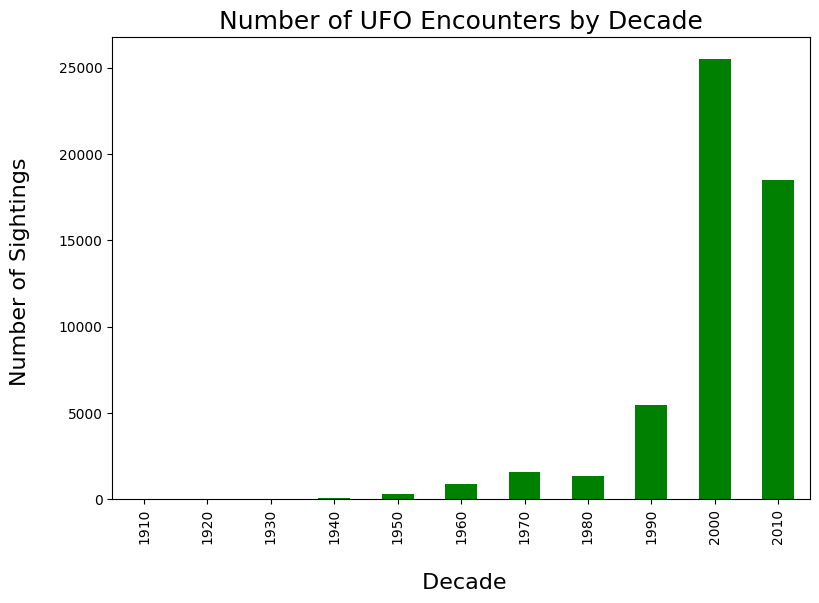

In [353]:
filtered_df['Date_Time']=filtered_df['Date_Time'].dt.year
filtered_df['Decade_Interval']=(filtered_df['Date_Time']//10)*10


number_of_ufo_encounters = filtered_df['Decade_Interval'].value_counts().sort_index();
number_of_ufo_encounters.plot.bar(figsize=(9,6),color='green');
plt.xlabel('\n Decade',fontsize=16)
plt.ylabel('Number of Sightings \n',fontsize=16)
plt.title('Number of UFO Encounters by Decade',fontsize=18)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);



### As a Data Analyst, I want to create a **Line Graph** to visualize the **Frequency of UFO sightings, by hour of the day**
* I will use a **Line Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

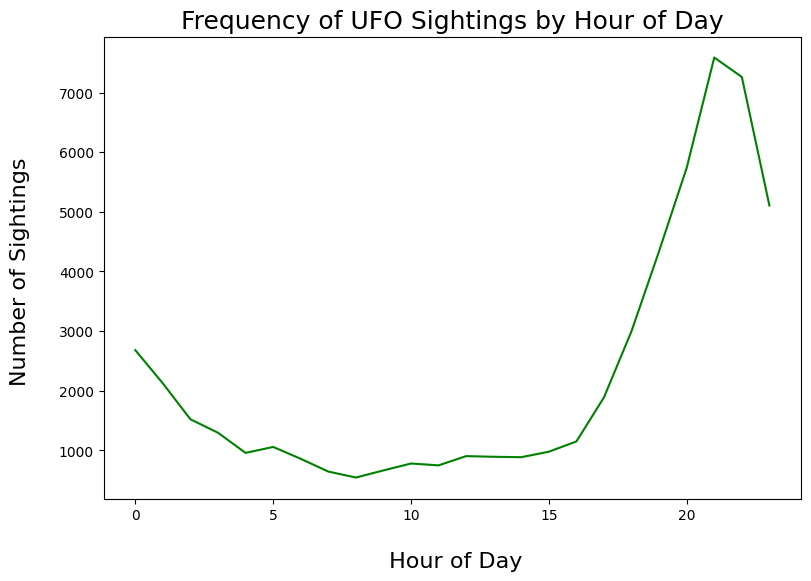

In [354]:
filtered_df['Date_Time'] = pd.to_datetime(df['Date_Time'])
filtered_df['Date_Time']=filtered_df['Date_Time'].dt.hour

sightings_by_hour = filtered_df['Date_Time'].value_counts().sort_index();
sightings_by_hour.plot.line(figsize=(9,6),color='green');
plt.xlabel('\n Hour of Day',fontsize=16)
plt.ylabel('Number of Sightings \n',fontsize=16)
plt.title('Frequency of UFO Sightings by Hour of Day',fontsize=18)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);


In [357]:
#Q1&2 filtered_df['UFO_Shape'].value_counts()
#Q3&4  filtered_df['Date_Time'].value_counts()
#filtered_df['State/Province'].value_counts() #California
#filtered_df
#filtered_df['City'].value_counts() #Seattle, Phoenix
#filtered_df[filtered_df['State/Providence']=='VA']
#filtered_df['Decade_Interval'=='2010'].value_counts()

Seattle              383
Phoenix              379
Las Vegas            294
Los Angeles          290
Portland             277
                    ... 
Smoaks                 1
Whitehouse             1
Hesperia (Sse Of)      1
Gilliam                1
Barron                 1
Name: City, Length: 10620, dtype: int64

### As a Data Analyst, I want to answer all questions in the following Markdown block to provide a **clear and detailed analysis of my UFO sighting findings**

1. Which UFO shape is the most frequently reported? 
    * Light

2. Which shape is least frequently reported?
    * Cross

3. Based on your analysis, what times of the day have the highest number of UFO sightings? 
    * 21:00

4. Are there other factors that may account for this pattern in the data?
    * There is an increase in sightings at night during 7-11pm

5. Do you see any surprising trends in the breakdown by decade? Do you have any theories or ideas that may explain these patterns?
    * There were an increase in sightings during the 2000s but a decrease in sightings during the 2010s

6. Based on your data analysis, what recommendation would you give to individuals interested in encountering a UFO?
    * For example, what time would be best to look, what UFO shapes should they expect to see, etc.
    * It would be best to look for light shaped UFOs during peak hours of 7-11pm in Seattle where most sightings have occurred.


### **Bonus:** As a Data Analyst, I want to visualize the frequency of **different UFO shape sightings for Virginia, Wisconsin, and Tennessee**, to see if there is any variation of UFO shape frequency between states
* I will use a **Stacked Bar Graph** to visualize this data
* I will include a label for the X and Y axis
* I will include a name for my chart

In [ ]:

stacked_graph = filtered_df['Virginia','Wisconsin','Tennessee'].value_counts().sort_index();
stacked_graph.plot.bar(figsize=(9,6),color=['green','black','orange'],stacked=True);
plt.xlabel('\n Hour of Day',fontsize=16)
plt.ylabel('Number of Sightings \n',fontsize=16)
plt.title('Frequency of UFO Sightings by Hour of Day',fontsize=18)
plt.xticks(fontsize=10);
plt.yticks(fontsize=10);

KeyError: ('Virginia', 'Wisconsin', 'Tennessee')